In [1]:
# clone the repo with 
# git clone https://github.com/NIRISS/CANUCS-DR-Notebooks.git
# cd CANUCS-DR-Notebooks

In [2]:
# requirements: numpy, matplotlib, corner, astropy, seaborn

import numpy as np
import matplotlib.pyplot as plt 
from astropy.table import Table
import os
# os.chdir('/path/to/git/clone/CANUCS-DR-Notebooks')
from canucs_fns import CANUCSGalaxy

# if this doesn't work install the datasets package with pip install datasets
import datasets
from datasets import load_dataset

In [3]:
# this is a combined list of all the CANUCS galaxies
# the first two digits of the ID contain information about their field & whether they are clu/ncf
key = {'1':'macs0417','2':'a370','3':'macs0416','4':'macs1423','5':'macs1149'}
key2 = {'1':'clu', '2':'ncf', '3':'nsf'}

canucs_idlist = Table.read('canucs_idlist.dat', format='ascii')
small_idlist = np.load('smallidlist.npz')['all_idx']
canucs_idlist

id,ra,dec,z_phot,z_ml
int64,float64,float64,float64,float64
1100001,64.41805826665747,-11.957389380509385,-1.0,-1.0
1100002,64.41367678077812,-11.953497070749775,0.3031376898288727,0.3031376898288727
1100003,64.40381545576437,-11.951267198239291,-1.0,-1.0
1100004,64.41809310785851,-11.951190771693314,0.08871957659721375,0.08871957659721375
1100005,64.40591566413323,-11.948651296992823,0.145921528339386,0.145921528339386
1100006,64.39918927580537,-11.947691309663494,0.10967493057250977,0.10967493057250977
1100007,64.42301094045949,-11.946933918964328,-1.0,-1.0
1100008,64.39413760882135,-11.945432344648854,0.09964266419410706,0.09964266419410706
1100009,64.39179907865889,-11.942341158994937,-1.0,-1.0


In [4]:
idx = 1102637
s = str(idx)
cluster = key[s[0]]
field = key2[s[1]]
fieldname = cluster+field
print('Galaxy with CANUCS ID: '+str(idx)+ ' is in field '+ fieldname)
# galaxy_index = canucs_idlist['id'].tolist().index(idx)

# del galaxy_index
try:
    galaxy_index = small_idlist.tolist().index(idx)
except:
    print('galaxy not found in current dataset')


Galaxy with CANUCS ID: 1102637 is in field macs0417clu


In [5]:
# # read more about loading subsets of the full data here: 
# # https://huggingface.co/docs/datasets/en/loading
# ds = load_dataset("kiyer/canucs_test", split='train[%.0f:%.0f]' %(galaxy_index, galaxy_index+1))
# ds

In [6]:
cg = CANUCSGalaxy(canucs_id = idx)

loaded data


In [7]:
cg.print_canucs_id()

Galaxy with CANUCS ID: 1102637 is in field macs0417clu


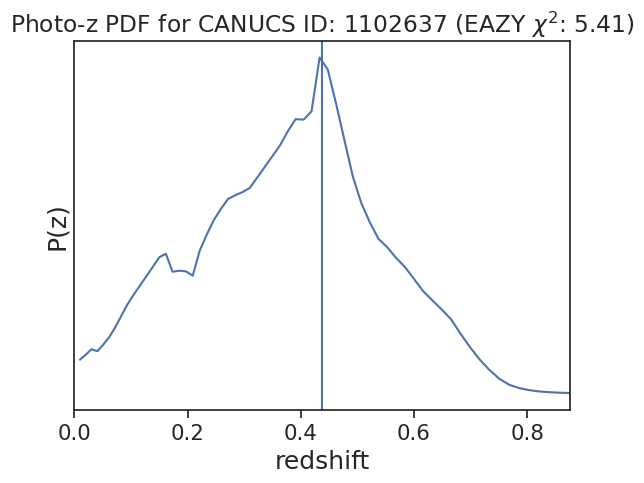

In [8]:
cg.plot_photoz_posterior()

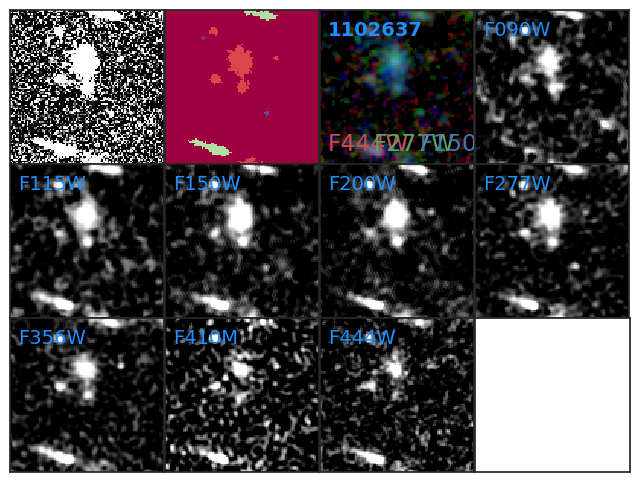

In [9]:
cg.plot_cutout()

showing both Dense Basis and Bagpipes fits


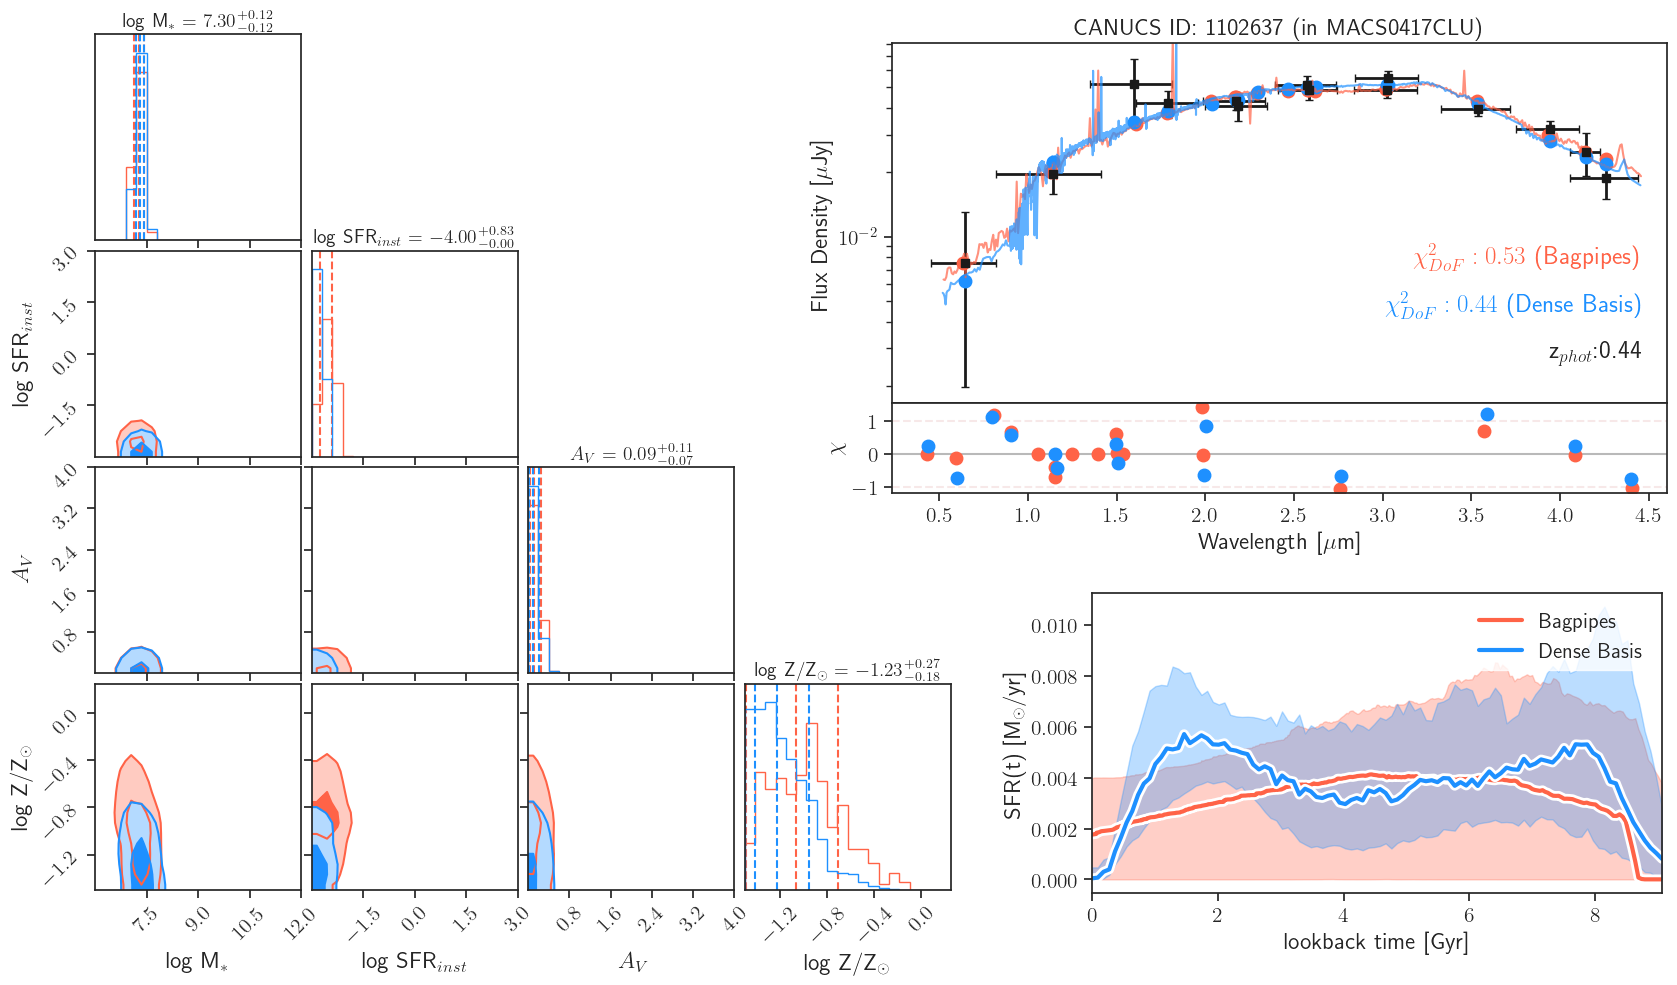

In [10]:
cg.plot_sed_fits()

In [11]:
cg.list_keys()

# Available keys are:

timeax_db
sfh_50_db
sfh_16_db
sfh_84_db
chi2_db
residuals_db
lam_db
spec_db
lam_centers_db
sed_db
corner_db_theta
corner_db_wts
timeax_bp
sfh_50_bp
sfh_16_bp
sfh_84_bp
chi2_bp
residuals_bp
lam_bp
spec_bp
lam_centers_bp
sed_bp
corner_bp_samples
bp_fits_exist
canucs_id
z_phot
lam_widths_db
sed_obs
err_obs
corner_labels
corner_ranges
SOURCE
SED_OBS
SED_ERR
SED_USEFLAG
SED_EAZY
SPEC_EAZY
SPEC_LAM_EAZY
EAZY_ZPDF
EAZY_Z
EAZY_CHI2
det_im
segm
rgb
F435W
F606W
F814W
F090W
F105W
F115WN
F115W
F125W
F140W
F150WN
F150W
F160W
F200WN
F200W
F277W
F356W
F410M
F444W


In [12]:
chi2_db = cg.get_key('chi2_db')
chi2_db

array(0.43668946)

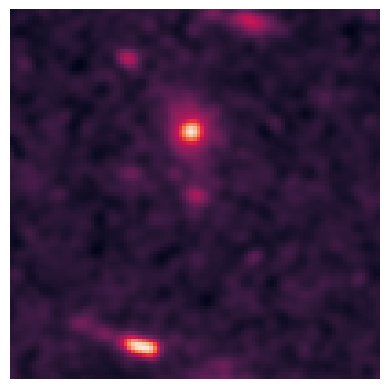

In [14]:
F115WN = cg.get_key('F115WN')
plt.imshow(F115WN, origin='lower'); plt.axis('off'); plt.show()